In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
cab_data = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer = pd.read_csv("Customer_ID.csv")
transaction = pd.read_csv("Transaction_ID.csv")

In [3]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [6]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [7]:
customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
transaction

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [10]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


## Lets look at summary

In [11]:
print("Cab Data")
print(cab_data.describe())

print("city")
print(city.describe())

print("Customer")
print(customer.describe())

print("Transactions Data")
print(transaction.describe())

Cab Data
       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000  
city
               City   Population      Users
count            20           20         20
unique           20           20         20
top    

## Data Cleaning

In [15]:
for col in cab_data.columns:
    if ' ' in i:
        cab_data = cab_data.rename(columns={col:col.replace(' ','_')})
        
for col in city.columns:
    if ' ' in i:
        city = city.rename(columns={col:col.replace(' ','_')})
        
for col in customer.columns:
    if ' ' in i:
        customer = customer.rename(columns={col:col.replace(' ','_')})
        
for col in transaction.columns:
    if ' ' in i:
        transaction = transaction.rename(columns={col:col.replace(' ','_')})

In [16]:
cab_data

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [17]:
from datetime import datetime, timedelta
def convert_to_date(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date


In [20]:
cab_data['Date_of_Travel'] = cab_data['Date_of_Travel'].apply(lambda x:convert_to_date(x))

In [22]:
cab_data['Date_of_Travel']

0        2016-01-07
1        2016-01-05
2        2016-01-01
3        2016-01-06
4        2016-01-02
            ...    
359387   2018-01-07
359388   2018-01-03
359389   2018-01-04
359390   2018-01-04
359391   2018-01-01
Name: Date_of_Travel, Length: 359392, dtype: datetime64[ns]

In [23]:
cab_data

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [24]:
months=[]
years =[]
for i in range(len(cab_data['Date_of_Travel'])):
    months.append(cab_data['Date_of_Travel'][i].month)
    years.append(cab_data['Date_of_Travel'][i].year)
cab_data['Month'] = months
cab_data['Year'] = years



In [25]:
cab_data.drop('Date_of_Travel', axis = 1, inplace = True)


In [26]:
cab_data

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016
...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,1,2018


## Exploratory Data Analysis

In [32]:
yellow_cab = cab_data[cab_data.Company == "Yellow Cab"].groupby(["Month"]).Transaction_ID.count()
yellow_cab

Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction_ID, dtype: int64

In [33]:
pink_cab = cab_data[cab_data.Company == "Pink Cab"].groupby(["Month"]).Transaction_ID.count()
pink_cab

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction_ID, dtype: int64

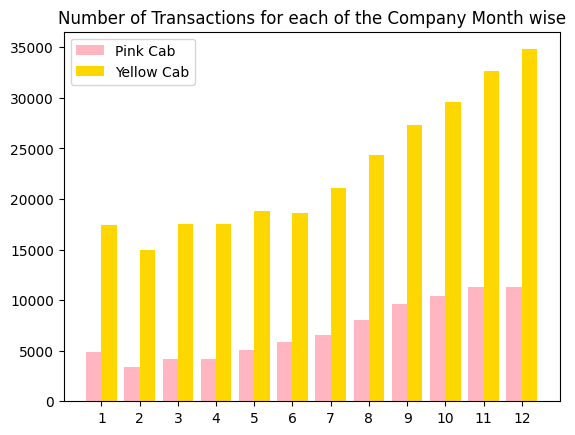

In [104]:
X = pink_cab.index
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, pink_cab.values, 0.4, label = 'Pink Cab', color='lightpink')
plt.bar(X_axis + 0.2, yellow_cab.values, 0.4, label = 'Yellow Cab', color='gold')
  
plt.xticks(X_axis, X)
plt.title("Number of Transactions for each of the Company Month wise")
plt.legend()
plt.show()

In [ ]:
plot1 = PinkCab.groupby('Year').Transaction_ID.count()
plot2 = YellowCab.groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='lightpink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='cornflowerblue', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

### Observation 
Yellow Cab has higher travels in all the months compared to Pink Cab. Also during the month of December which is generally considered as holiday season the transactions are the highest for yellow cab company

## KMs Travelled

In [47]:
cab_data['KM_Travelled'].describe()

count    359392.000000
mean         22.567254
std          12.233526
min           1.900000
25%          12.000000
50%          22.440000
75%          32.960000
max          48.000000
Name: KM_Travelled, dtype: float64

In [48]:
cab_data[cab_data.Company == "Pink Cab"]['KM_Travelled'].describe()

count    84711.000000
mean        22.559917
std         12.231092
min          1.900000
25%         12.000000
50%         22.440000
75%         32.960000
max         48.000000
Name: KM_Travelled, dtype: float64

In [49]:
cab_data[cab_data.Company == "Yellow Cab"]['KM_Travelled'].describe()

count    274681.000000
mean         22.569517
std          12.234298
min           1.900000
25%          11.990000
50%          22.440000
75%          32.960000
max          48.000000
Name: KM_Travelled, dtype: float64

In [50]:
PinkCab = cab_data[cab_data.Company == "Pink Cab"]
YellowCab = cab_data[cab_data.Company == "Yellow Cab"]

/var/folders/5b/_80n_r3s42d_yc94yjfdh__c0000gn/T/ipykernel_30007/897638149.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(PinkCab['KM_Travelled'], kde=False, color='blue', bins=70)


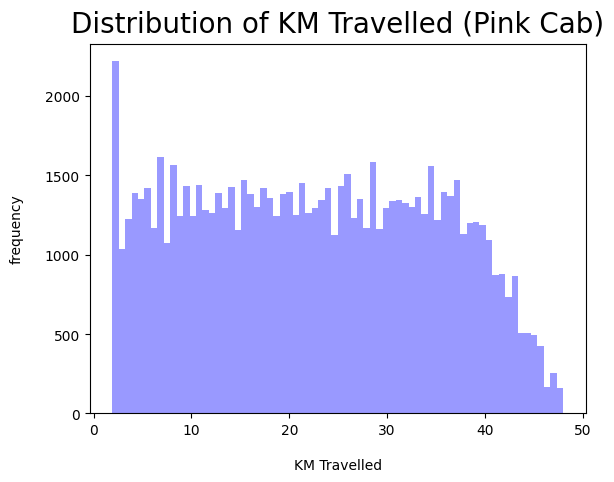

In [52]:
ax = sns.distplot(PinkCab['KM_Travelled'], kde=False, color='blue', bins=70)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

/var/folders/5b/_80n_r3s42d_yc94yjfdh__c0000gn/T/ipykernel_30007/1453494780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(YellowCab['KM_Travelled'], kde=False, color='blue', bins=70)


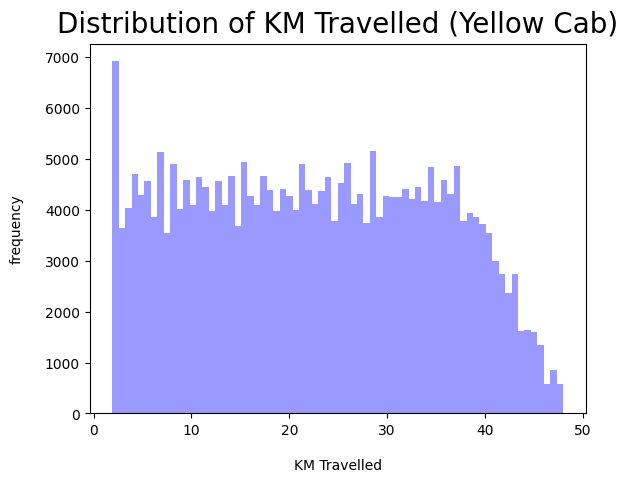

In [53]:
ax = sns.distplot(YellowCab['KM_Travelled'], kde=False, color='blue', bins=70)
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

The KM_Travelled ranges from 1.9 km to 48 km. The plot and the values look similar for both the companies

## Price Charges & Cost of Trip

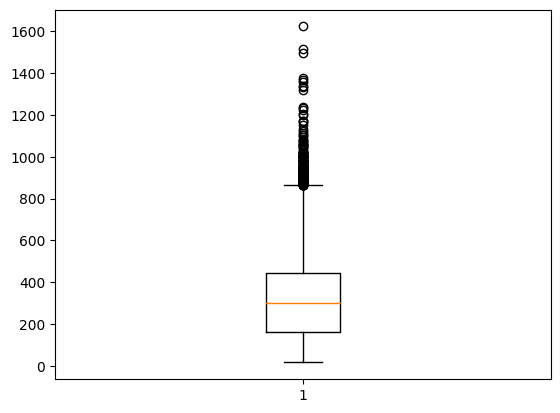

In [63]:

plt.boxplot(PinkCab['Price_Charged'])
plt.show()

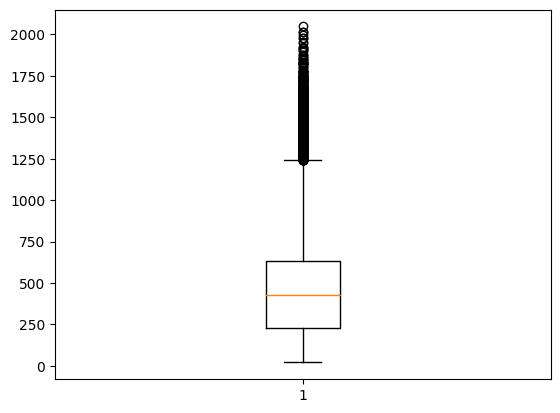

In [64]:
plt.boxplot(YellowCab['Price_Charged'])
plt.show()

These outliers are due to use of high-end cars so decided to keep it. 
The price charge range for Yellow cab is more than the Pink cab.

## Checking correlation between KM Travelled and Price Charged

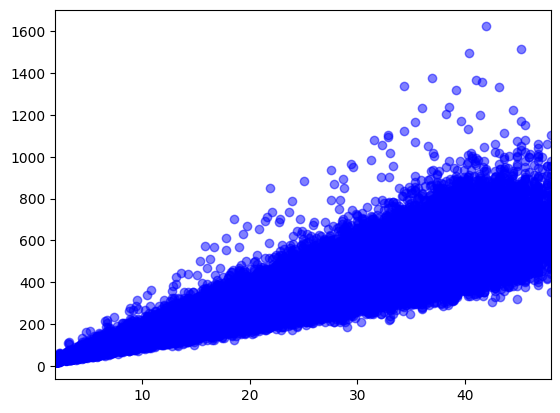

In [75]:
x = PinkCab['KM_Travelled']
y = PinkCab['Price_Charged']

lineStart = x.min() 
lineEnd = x.max()  

plt.figure()
plt.scatter(x, y, color = 'b', alpha=0.5)
plt.xlim(lineStart, lineEnd)
plt.show()

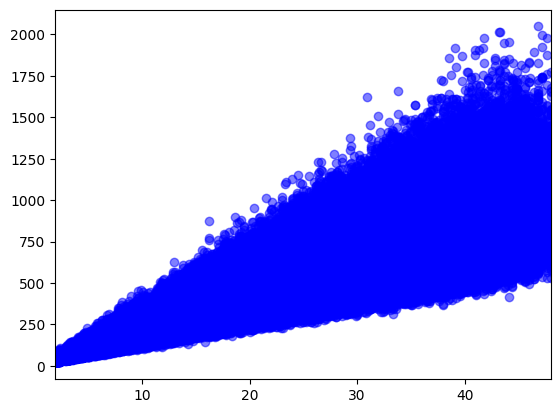

In [76]:
x = YellowCab['KM_Travelled']
y = YellowCab['Price_Charged']

lineStart = x.min() 
lineEnd = x.max()  

plt.figure()
plt.scatter(x, y, color = 'b', alpha=0.5)
plt.xlim(lineStart, lineEnd)
plt.show()

In [77]:
PinkCab['KM_Travelled'].corr(PinkCab['Price_Charged'])

0.9277652782594862

In [78]:
YellowCab['KM_Travelled'].corr(YellowCab['Price_Charged'])

0.8597086294478499

Distance is one of the important factors, which drives the price of the rides.
We could see that there is a positive correlation in the graph for both Pink and Yellow cab.
For the yellow cabs the price goes to a maximum value of 2000 which is high compared to pink cabs

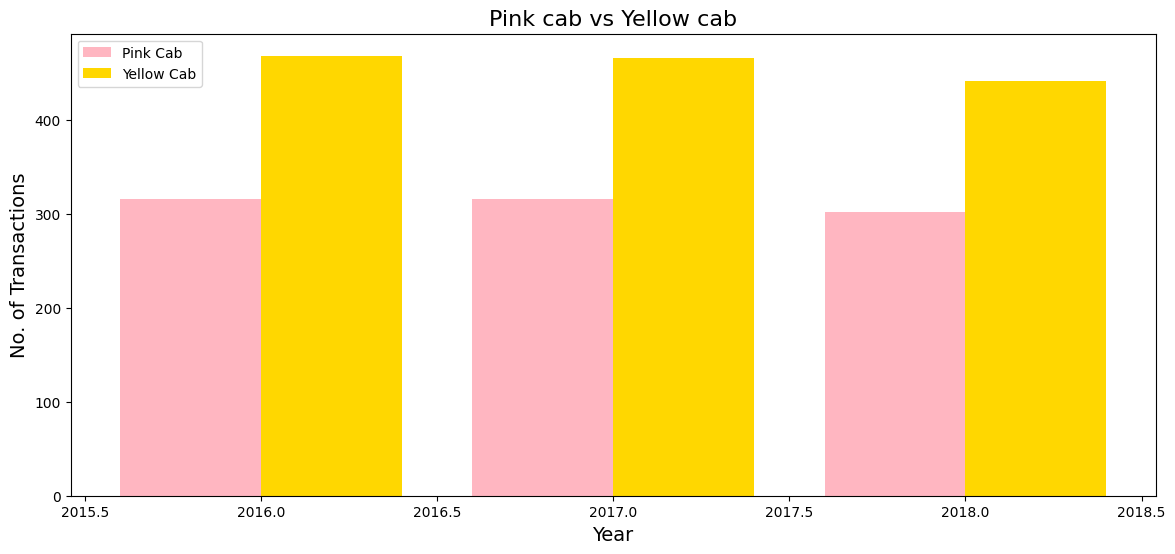

In [96]:
plot1 = PinkCab.groupby('Year').Price_Charged.mean()
plot2 = YellowCab.groupby('Year').Price_Charged.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='lightpink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='gold', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

## YearWise - Cost , Price

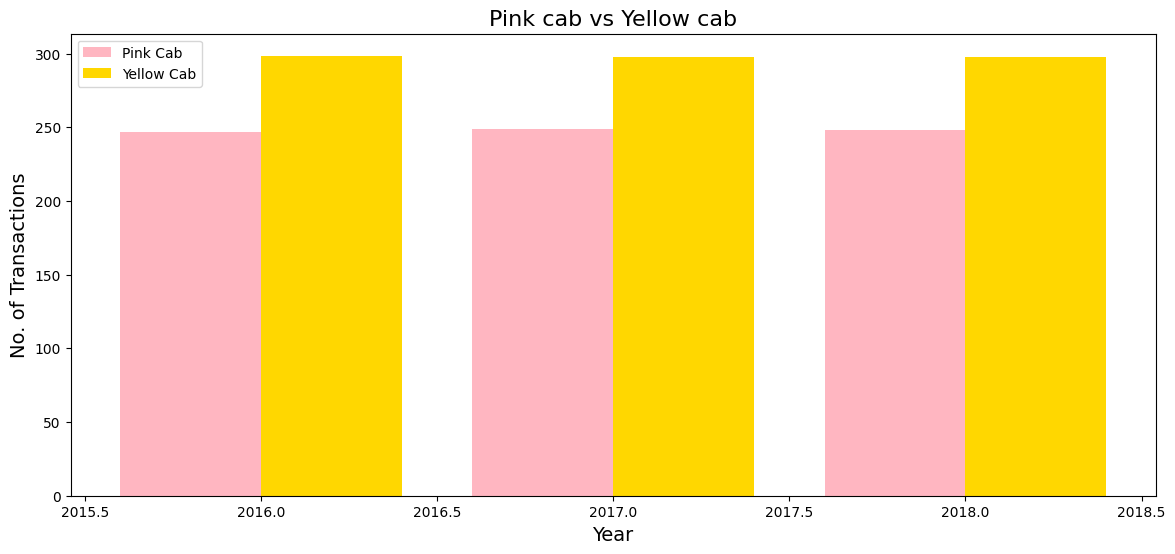

In [97]:
plot1 = PinkCab.groupby('Year').Cost_of_Trip.mean()
plot2 = YellowCab.groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='lightpink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='gold', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

## Pink Cab

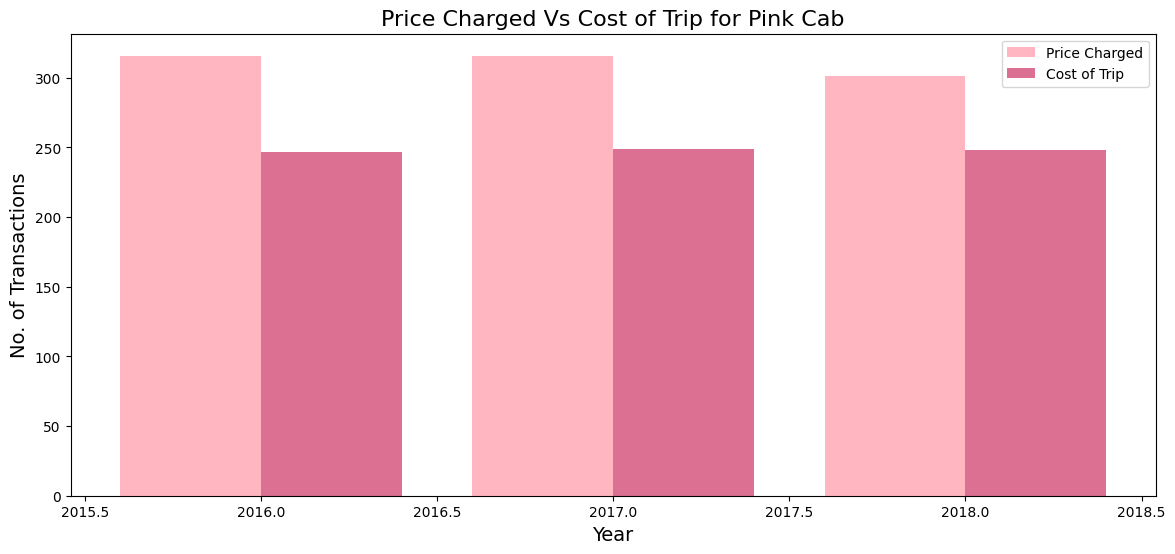

In [99]:
plot1 = PinkCab.groupby('Year').Price_Charged.mean()
plot2 = PinkCab.groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='lightpink', align='center',label='Price Charged')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='palevioletred', align='center',label='Cost of Trip')
plt.title("Price Charged Vs Cost of Trip for Pink Cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

## Yellow Cab

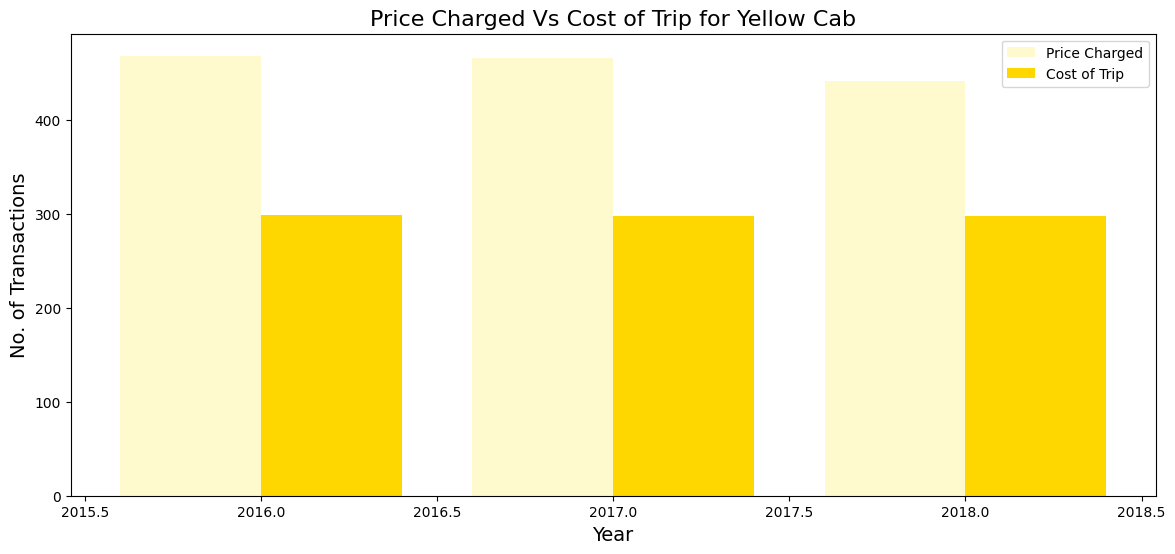

In [101]:
plot1 = YellowCab.groupby('Year').Price_Charged.mean()
plot2 = YellowCab.groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='lemonchiffon', align='center',label='Price Charged')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='gold', align='center',label='Cost of Trip')
plt.title("Price Charged Vs Cost of Trip for Yellow Cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

Price Charged - Cost of Trip gives the profit margin for each cab. Yellow cab company has the high profit margin overall all the years

## City Data

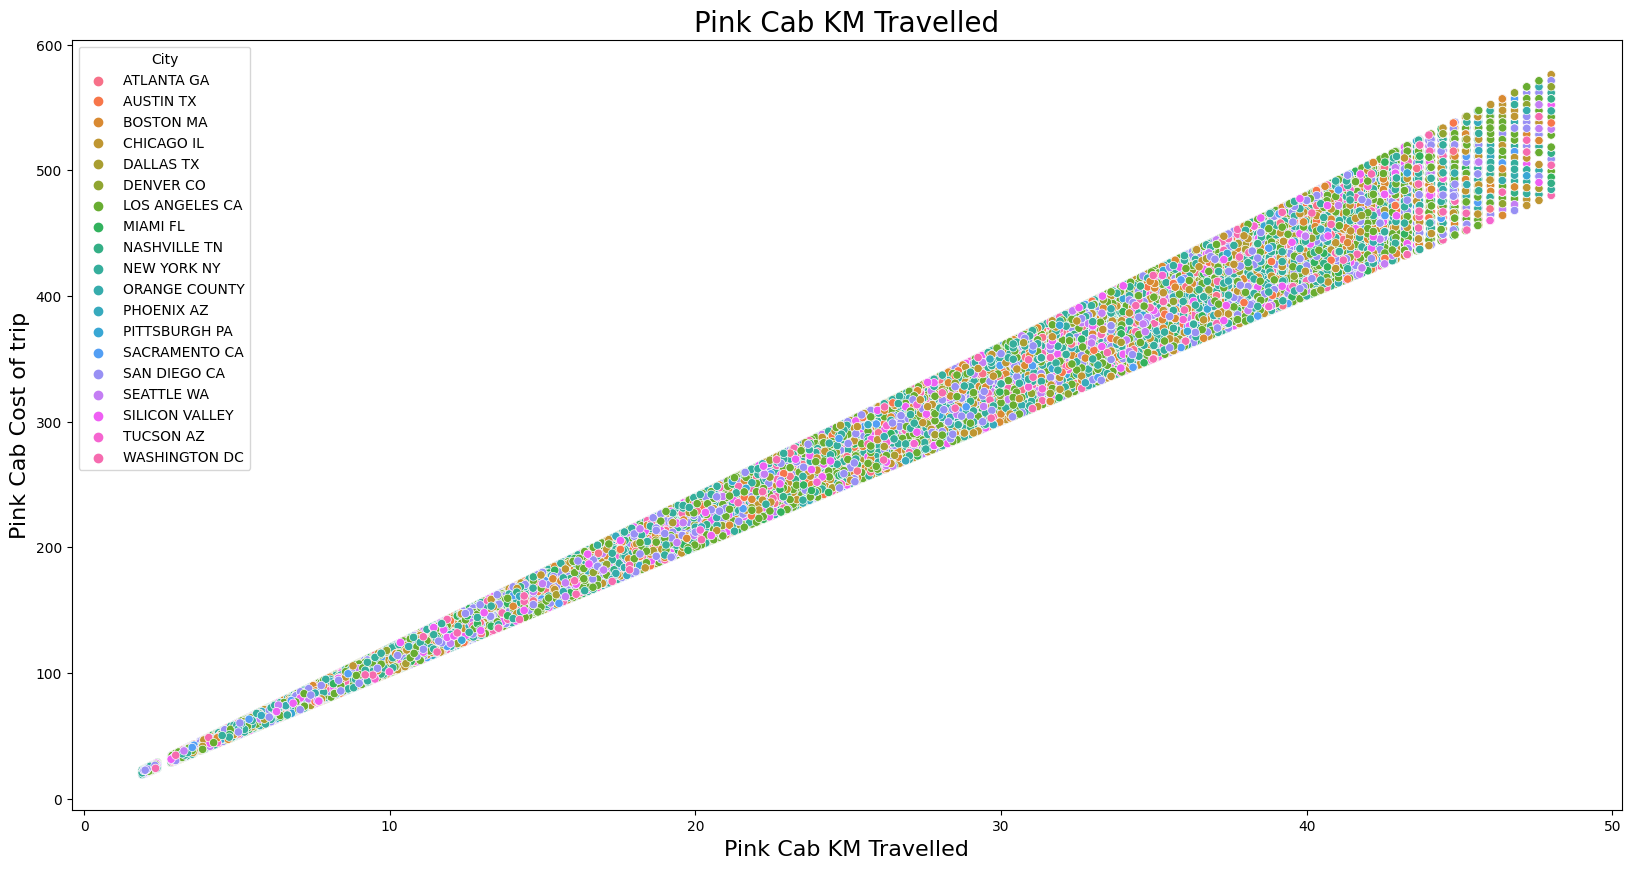

In [108]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab_data, x=PinkCab["KM_Travelled"], y=PinkCab['Cost_of_Trip'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Cost of trip',fontsize = 16)
plt.xlabel('Pink Cab KM Travelled',fontsize = 16)
plt.show()

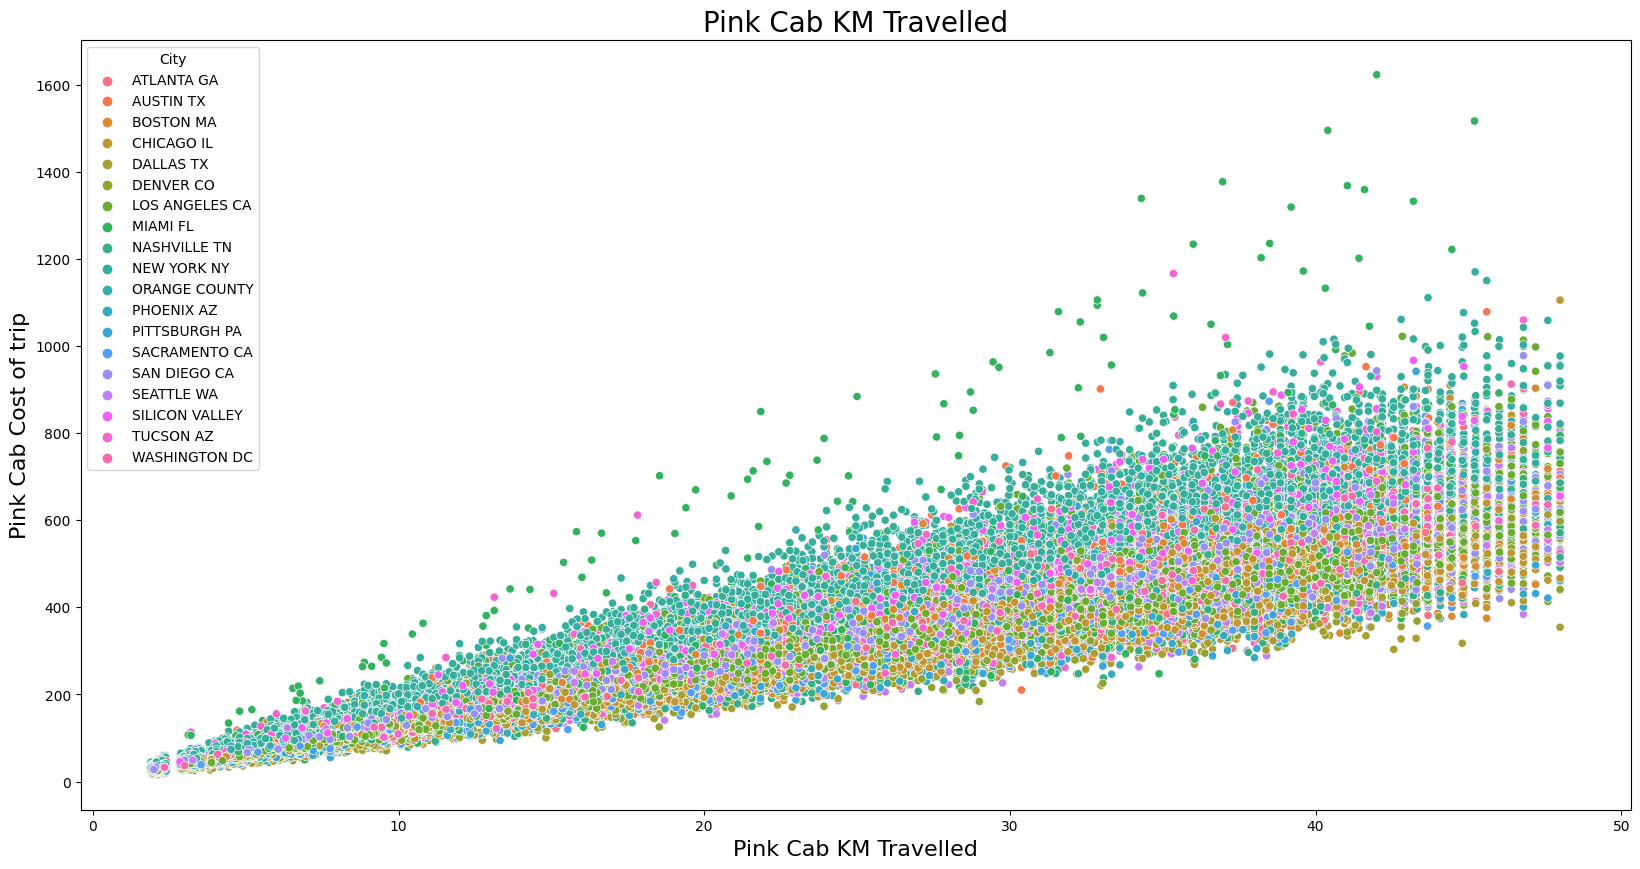

In [109]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab_data, x=PinkCab["KM_Travelled"], y=PinkCab['Price_Charged'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Cost of trip',fontsize = 16)
plt.xlabel('Pink Cab KM Travelled',fontsize = 16)
plt.show()

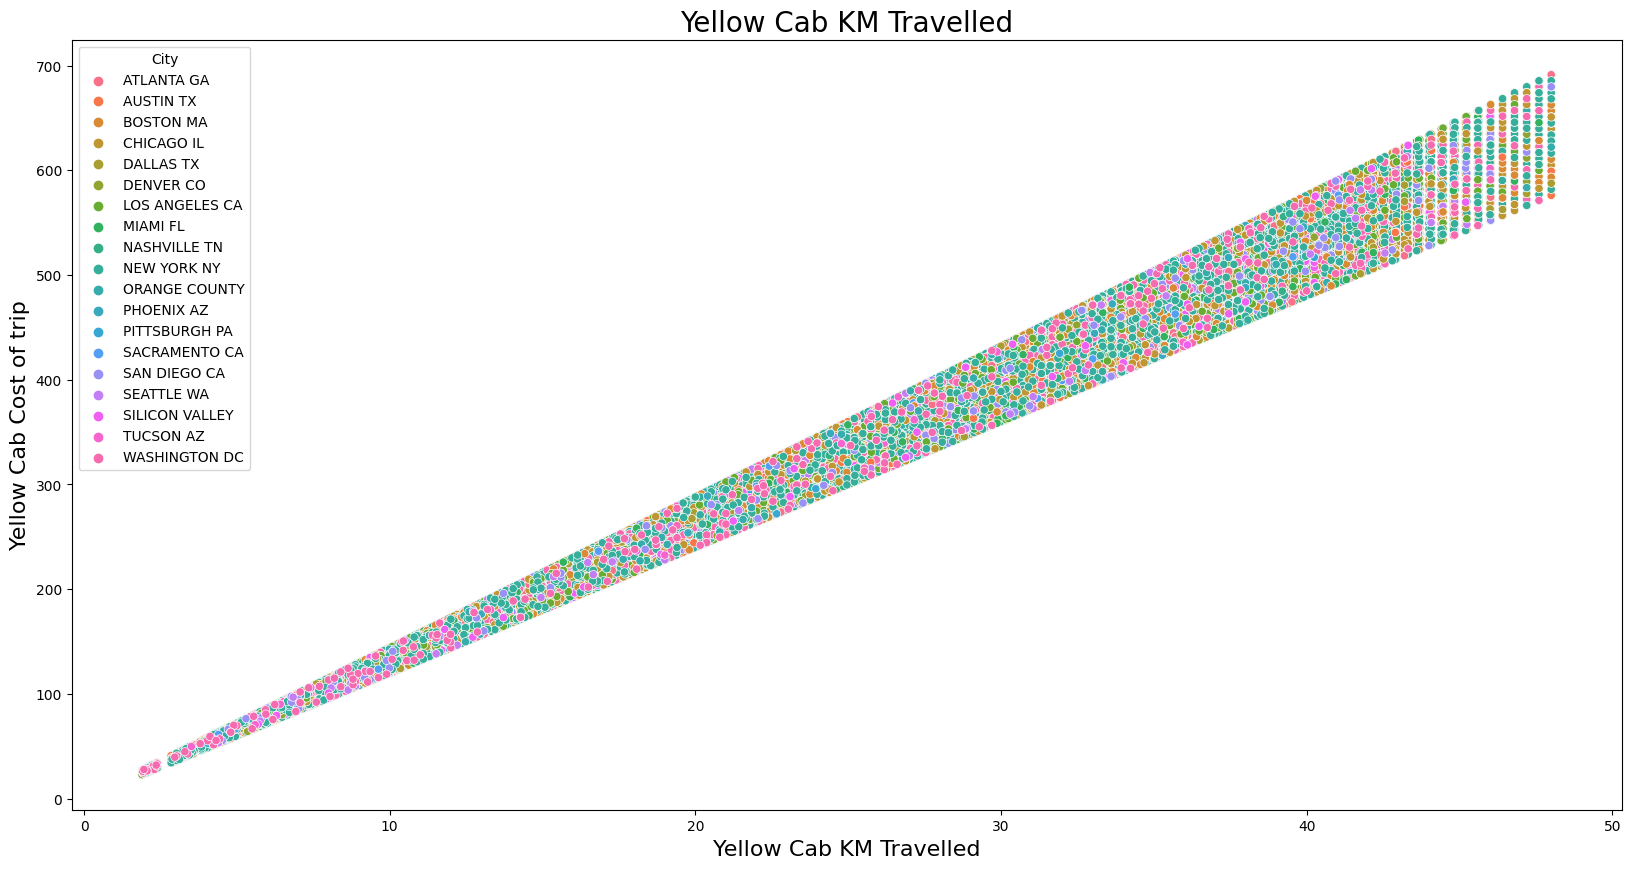

In [110]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab_data, x=YellowCab["KM_Travelled"], y=YellowCab['Cost_of_Trip'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Cost of trip',fontsize = 16)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 16)
plt.show()

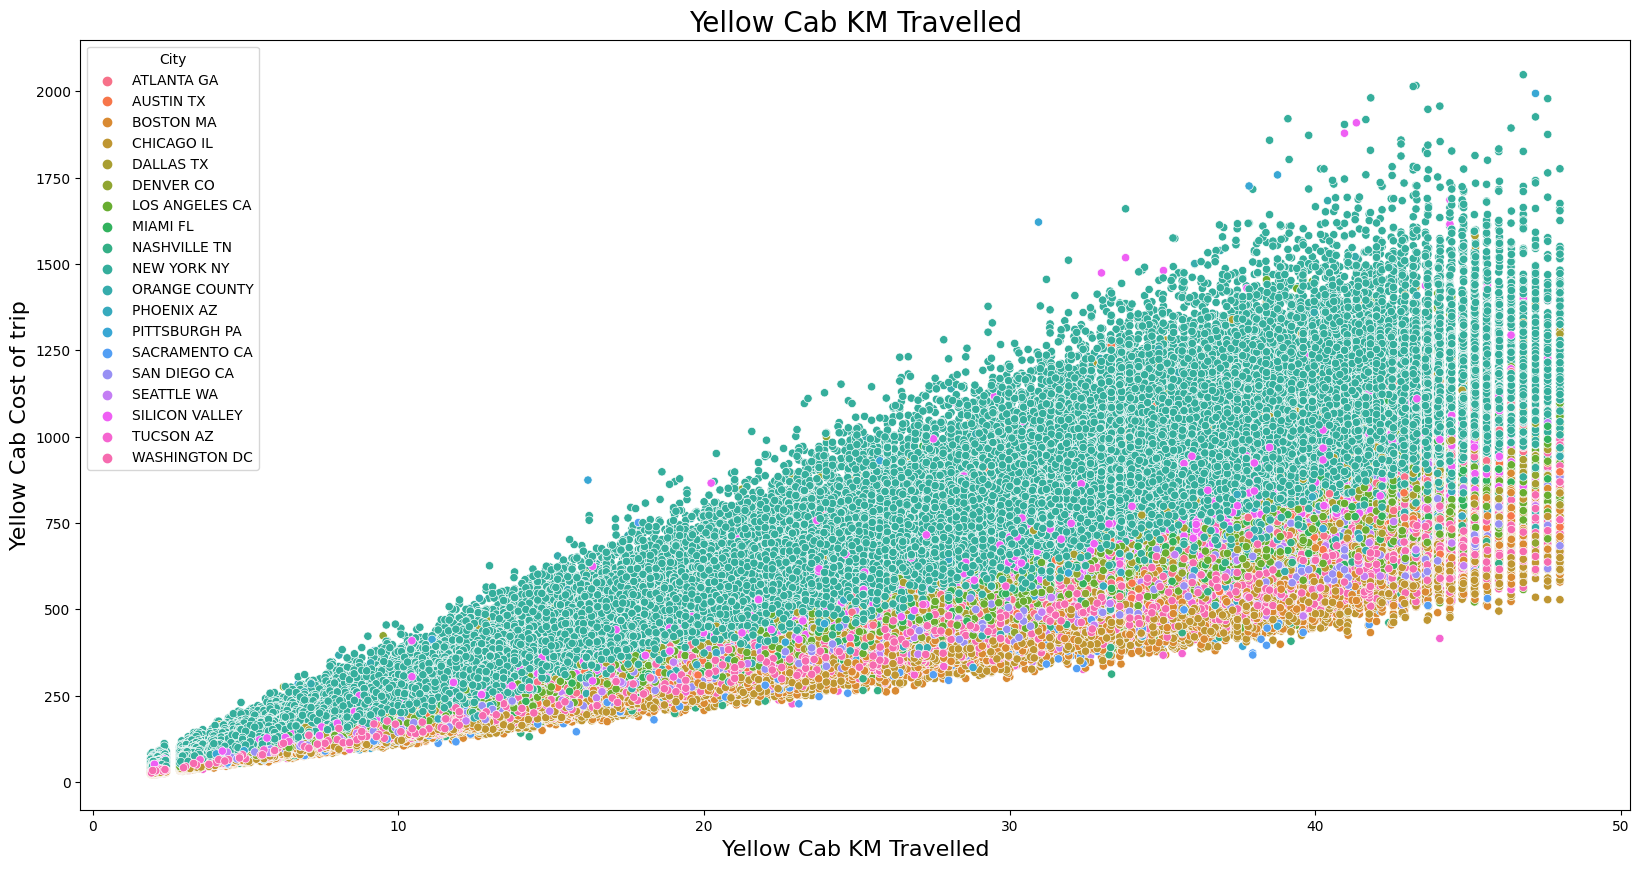

In [111]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab_data, x=YellowCab["KM_Travelled"], y=YellowCab['Price_Charged'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Cost of trip',fontsize = 16)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 16)
plt.show()

## Combining Datasets - Final Dataset

In [134]:
tab1 = cab_data.set_index(['Transaction_ID'])
tab2 = transaction.set_index(['Transaction_ID'])
data1 = tab1.join(tab2)


In [135]:
tab3 = data1.set_index([data1.index,'Customer_ID'])
tab4 = customer.set_index(['Customer_ID'])
data2 = tab3.join(tab4)


In [136]:
tab5 = data2.set_index([data2.index,'City'])
tab6 = city.set_index(['City'])
new_data = tab5.join(tab6)

In [137]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 359392 entries, (10000011, 29290, 'ATLANTA GA') to (10440107, 52917, 'WASHINGTON DC')
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Company             359392 non-null  object 
 1   KM_Travelled        359392 non-null  float64
 2   Price_Charged       359392 non-null  float64
 3   Cost_of_Trip        359392 non-null  float64
 4   Month               359392 non-null  int64  
 5   Year                359392 non-null  int64  
 6   Payment_Mode        359392 non-null  object 
 7   Gender              359392 non-null  object 
 8   Age                 359392 non-null  int64  
 9   Income_(USD/Month)  359392 non-null  int64  
 10  Population          359392 non-null  object 
 11  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 48.2+ MB


In [138]:
#data = data.rename(columns={'Income_(USD/Month)':'Income'})
city_users = new_data.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

In [140]:
new_data = new_data.reset_index()
new_data

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.6350,1,2016,Card,Male,28,10813,"814,885","24,701"
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.8540,1,2016,Card,Male,27,9237,"814,885","24,701"
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.6320,1,2016,Cash,Male,53,11242,"814,885","24,701"
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.6020,1,2016,Cash,Male,23,23327,"814,885","24,701"
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.7760,1,2016,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651,"418,859","127,001"
359388,10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528,"418,859","127,001"
359389,10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966,"418,859","127,001"
359390,10440106,52175,WASHINGTON DC,Yellow Cab,8.80,146.19,114.0480,1,2018,Card,Male,32,6423,"418,859","127,001"


In [142]:
pink_cab_tran = new_data[new_data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
yellow_cab_tran = new_data[new_data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()


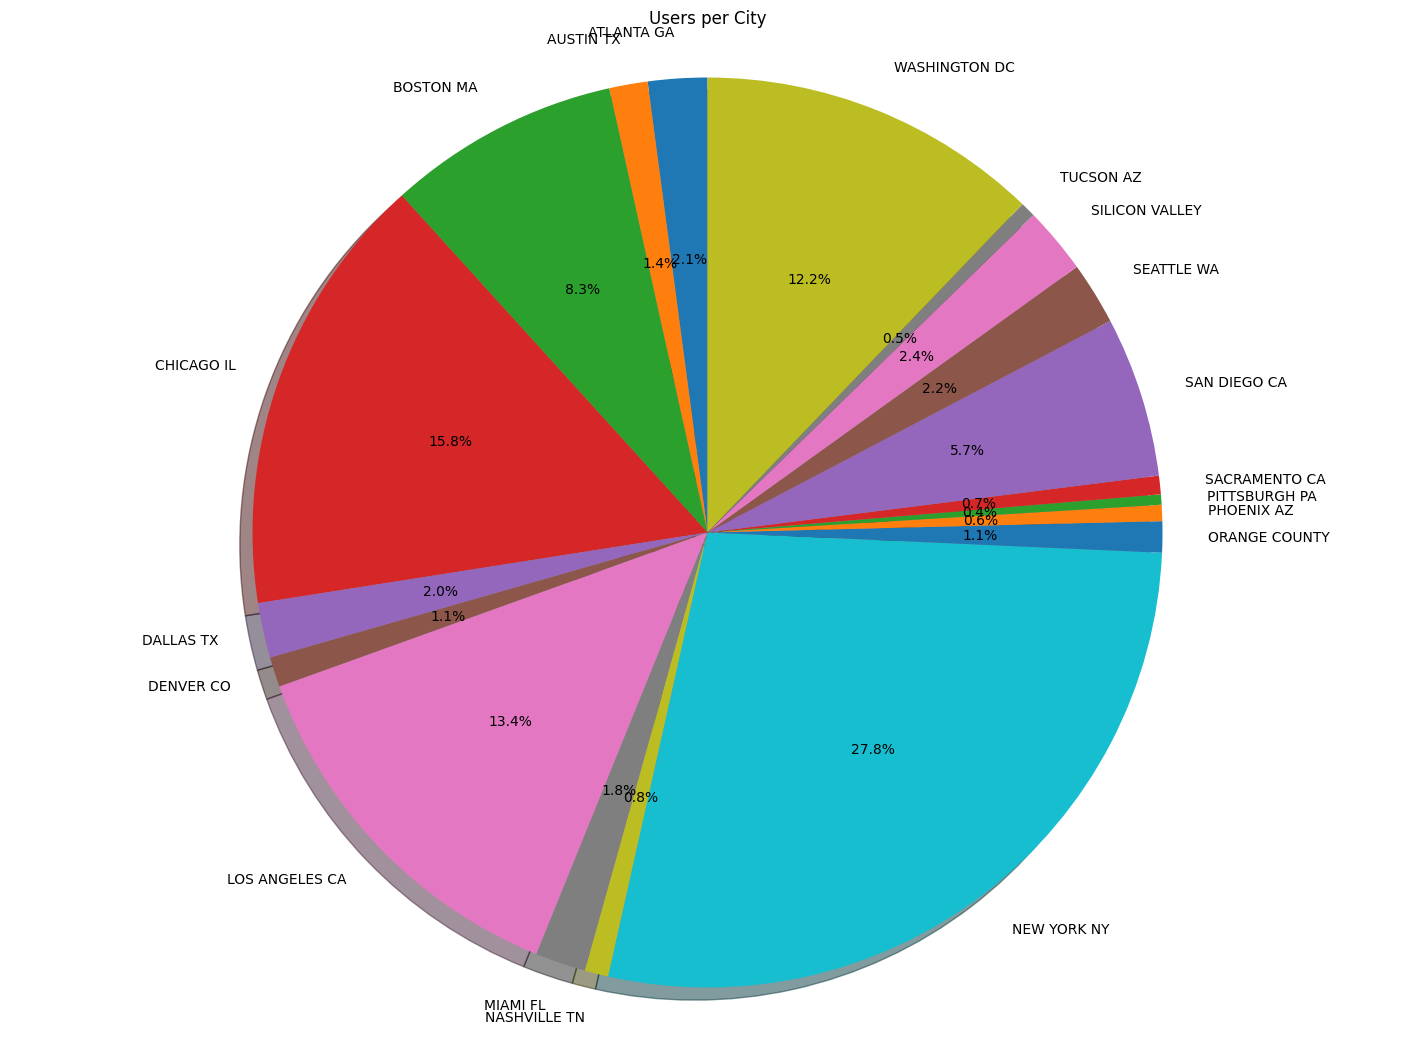

In [143]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

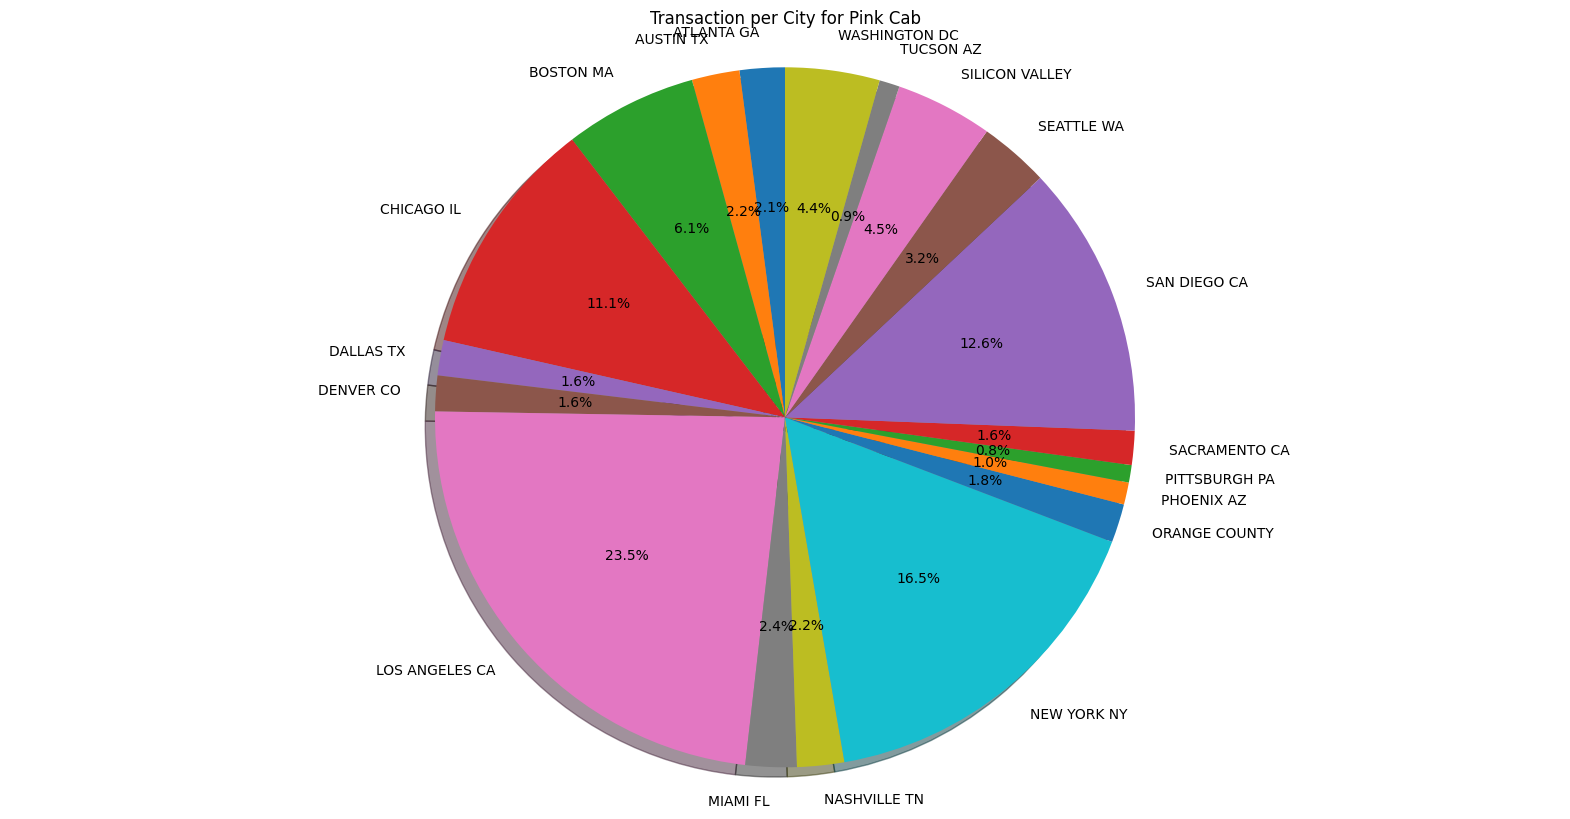

In [146]:
labs = pink_cab_tran.index
vals = pink_cab_tran.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

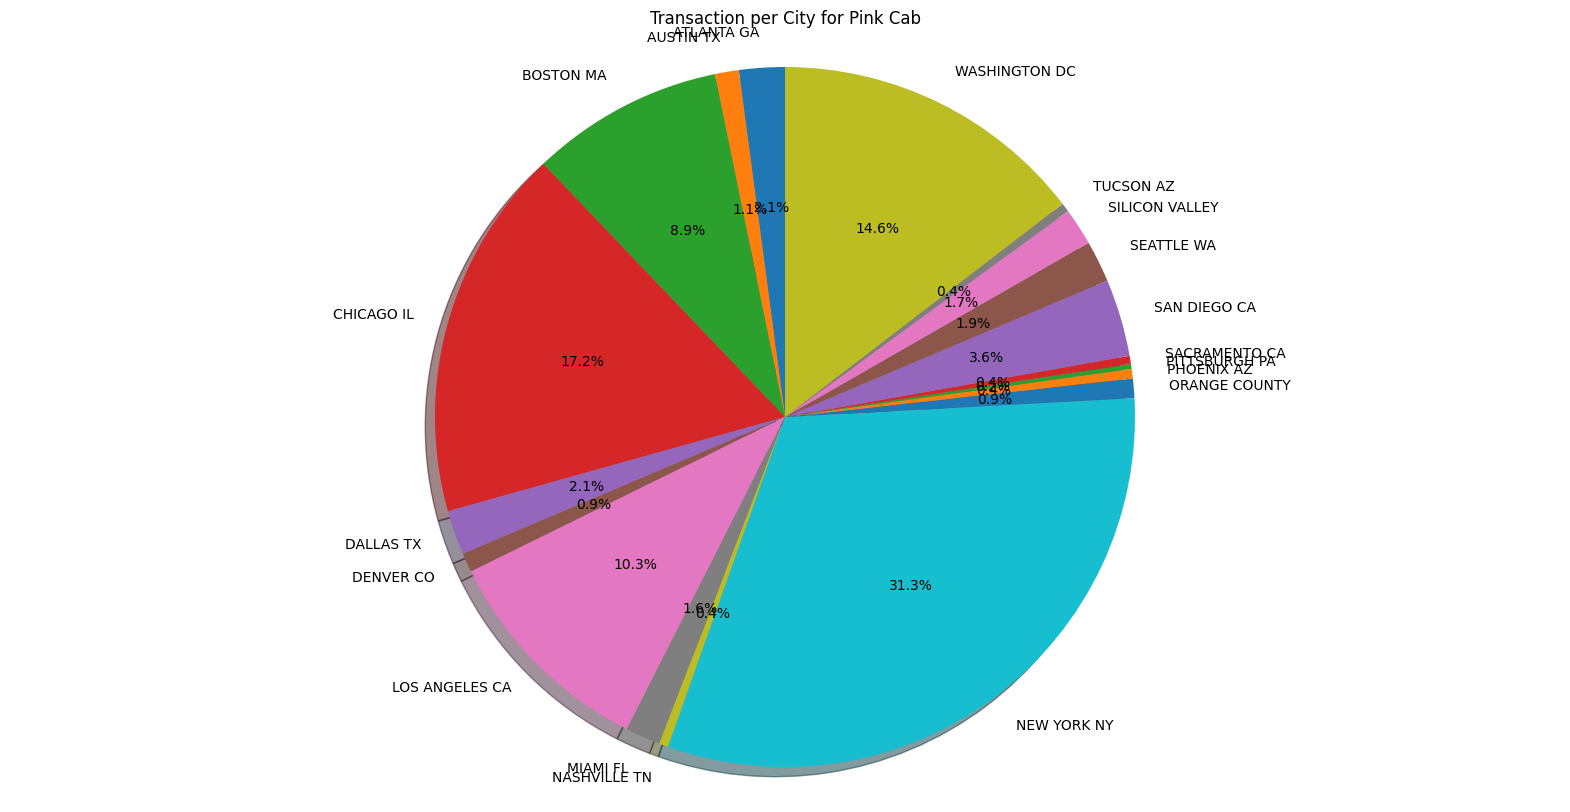

In [147]:
labs = yellow_cab_tran.index
vals = yellow_cab_tran.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

In [149]:
new_data['Profit'] = (new_data['Price_Charged']-new_data['Cost_of_Trip'])
new_data.head()

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Profit
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,1,2016,Card,Male,28,10813,"814,885","24,701",57.315
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,1,2016,Card,Male,27,9237,"814,885","24,701",23.666
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,1,2016,Cash,Male,53,11242,"814,885","24,701",27.568
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,1,2016,Cash,Male,23,23327,"814,885","24,701",25.798
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,1,2016,Card,Male,33,8536,"814,885","24,701",16.844


In [151]:
df = new_data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income_(USD/Month)','Profit']]

In [153]:
df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income_(USD/Month),Profit
KM_Travelled,1.000000,0.835753,0.981848,-0.001773,-0.001094,-0.000369,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.059639,-0.036903,-0.003084,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.008309,-0.001766,-0.000189,-0.000633,0.486056
Month,-0.001773,-0.059639,-0.008309,1.000000,-0.033169,-0.002376,0.000585,-0.093886
Year,-0.001094,-0.036903,-0.001766,-0.033169,1.000000,-0.000497,-0.001679,-0.061420
Age,-0.000369,-0.003084,-0.000189,-0.002376,-0.000497,1.000000,0.003907,-0.005093
Income_(USD/Month),-0.000544,0.003228,-0.000633,0.000585,-0.001679,0.003907,1.000000,0.006148
Profit,0.462768,0.864154,0.486056,-0.093886,-0.061420,-0.005093,0.006148,1.000000


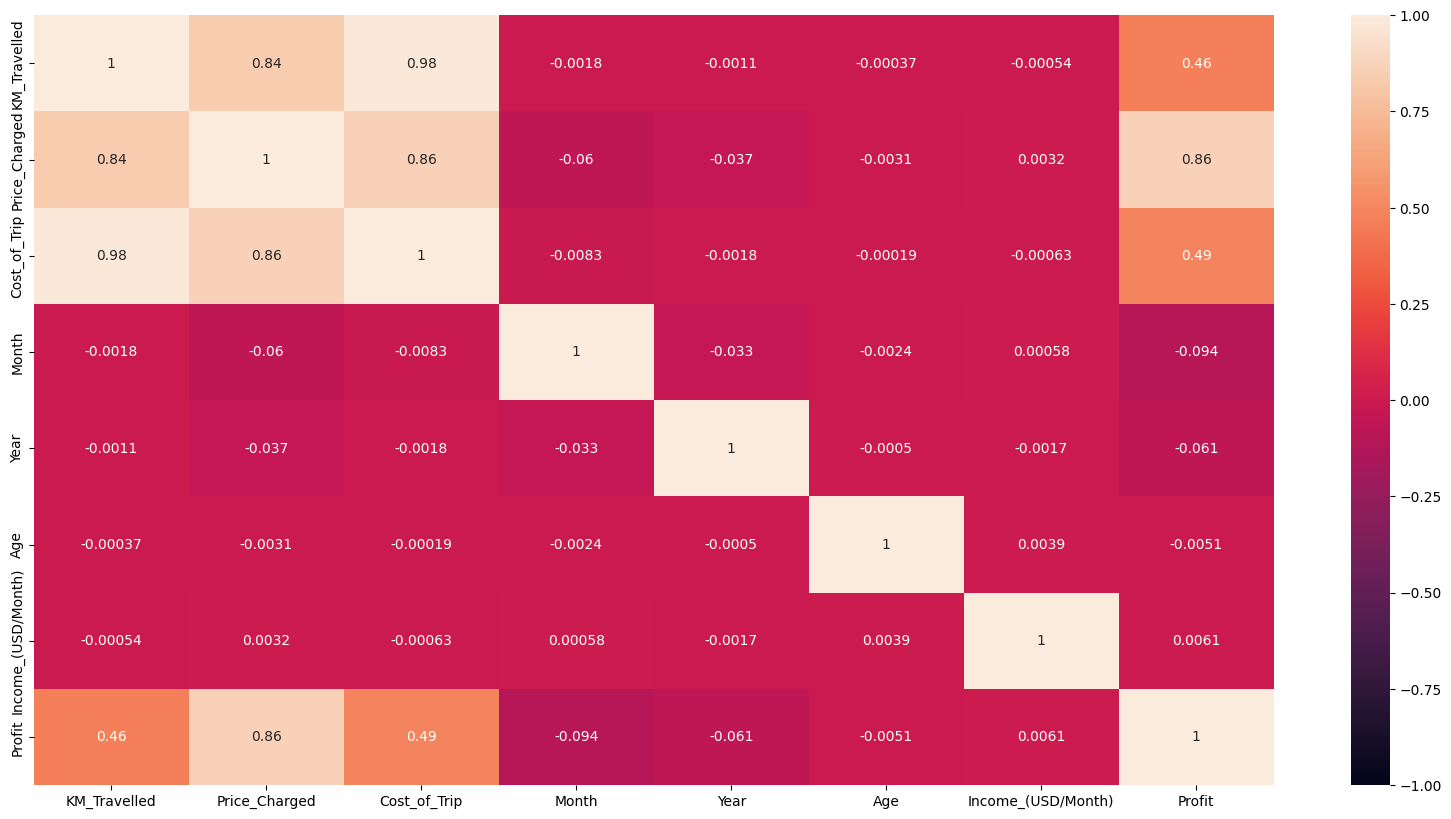

In [155]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

Correlation between Price Charged and Profit

## Hypothesis Testing

## 1Q Null Hypothesis:Margin remain the same regarding Gender for both Yellow Cab & Pink Cab

In [157]:
a = new_data[(new_data.Gender=='Female')&(new_data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = new_data[(new_data.Gender=='Male')&(new_data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We reject the null hypothesis that Profit is dependent on gender for cabs')
else:
    print('We fail to reject the null hypothesis')
    
print('P value is ', p_value)

116000 158681
We reject the null hypothesis that Profit is dependent on gender for cabs
P value is  6.060473042494056e-25


In [158]:
a = new_data[(new_data.Gender=='Female')&(new_data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = new_data[(new_data.Gender=='Male')&(new_data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We reject the null hypothesis that Profit is dependent on gender for cabs')
else:
    print('We fail to reject the null hypothesis')
    
print('P value is ', p_value)

37480 47231
We fail to reject the null hypothesis
P value is  0.11515305900425798


## 2Q Is there difference in margins for Card payer and Cash payers

In [159]:
#Pink Cab
a = new_data[(new_data.Payment_Mode=='Cash')&(new_data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = new_data[(new_data.Payment_Mode=='Card')&(new_data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()


from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We reject the null hypothesis that Profit is dependent on gender for cabs')
else:
    print('We fail to reject the null hypothesis')
    
print('P value is ', p_value)

We fail to reject the null hypothesis
P value is  0.7900465828793286


In [160]:
#Yellow Cab
a = new_data[(new_data.Payment_Mode=='Cash')&(new_data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = new_data[(new_data.Payment_Mode=='Card')&(new_data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()


from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We reject the null hypothesis that Profit is dependent on gender for cabs')
else:
    print('We fail to reject the null hypothesis')
    
print('P value is ', p_value)

We fail to reject the null hypothesis
P value is  0.2933060638298729


There is no difference in Margin regarding mode of Payment for both Yellow & Pink Cab

## 3Q -  Is there any difference of distributions of customer income groups between two cabs

In [161]:
#Margins per Age
new_data[new_data.Age<=50].groupby('Company').Profit.mean()
new_data[new_data.Age>50].groupby('Company').Profit.mean()

Company
Pink Cab       62.053044
Yellow Cab    155.855885
Name: Profit, dtype: float64

In [162]:
#Pink Cab
a = new_data[(new_data.Age<=50)&(new_data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = new_data[(new_data.Age>50)&(new_data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We reject the null hypothesis that Profit is dependent on gender for cabs')
else:
    print('We fail to reject the null hypothesis')
    
print('P value is ', p_value)

71228 13483
We fail to reject the null hypothesis
P value is  0.32817487547980695


In [164]:
#Yellow Cab
a = new_data[(new_data.Age<=50)&(new_data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = new_data[(new_data.Age>50)&(new_data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We reject the null hypothesis that Profit is dependent on gender for cabs')
else:
    print('We fail to reject the null hypothesis')
    
print('P value is ', p_value)

231480 43201
We reject the null hypothesis that Profit is dependent on gender for cabs
P value is  6.4942568177993685e-09


In [ ]:
Yellow Cabs also gives discount to people older than 50

In [166]:
new_data

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Profit
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.6350,1,2016,Card,Male,28,10813,"814,885","24,701",57.3150
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.8540,1,2016,Card,Male,27,9237,"814,885","24,701",23.6660
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.6320,1,2016,Cash,Male,53,11242,"814,885","24,701",27.5680
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.6020,1,2016,Cash,Male,23,23327,"814,885","24,701",25.7980
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.7760,1,2016,Card,Male,33,8536,"814,885","24,701",16.8440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651,"418,859","127,001",5.8800
359388,10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528,"418,859","127,001",6.9020
359389,10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966,"418,859","127,001",87.4200
359390,10440106,52175,WASHINGTON DC,Yellow Cab,8.80,146.19,114.0480,1,2018,Card,Male,32,6423,"418,859","127,001",32.1420


## 4Q - Does Income effect Cab Companies profit

In [170]:
new_data = new_data.rename(columns={'Income_(USD/Month)': 'Income'})

In [171]:
new_data

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income,Population,Users,Profit
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.6350,1,2016,Card,Male,28,10813,"814,885","24,701",57.3150
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.8540,1,2016,Card,Male,27,9237,"814,885","24,701",23.6660
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.6320,1,2016,Cash,Male,53,11242,"814,885","24,701",27.5680
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.6020,1,2016,Cash,Male,23,23327,"814,885","24,701",25.7980
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.7760,1,2016,Card,Male,33,8536,"814,885","24,701",16.8440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651,"418,859","127,001",5.8800
359388,10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528,"418,859","127,001",6.9020
359389,10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966,"418,859","127,001",87.4200
359390,10440106,52175,WASHINGTON DC,Yellow Cab,8.80,146.19,114.0480,1,2018,Card,Male,32,6423,"418,859","127,001",32.1420


In [172]:
new_data[new_data.Income<=10000].groupby('Company').Profit.mean()
new_data[new_data.Income>10000].groupby('Company').Profit.mean()

Company
Pink Cab       62.808566
Yellow Cab    161.629252
Name: Profit, dtype: float64

In [173]:
#Pink Cab
a = new_data[(new_data.Income<=10000)&(new_data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
b = new_data[(new_data.Income>10000)&(new_data.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We reject the null hypothesis that Profit is dependent on gender for cabs')
else:
    print('We fail to reject the null hypothesis')
    
print('P value is ', p_value)

26702 58009
We fail to reject the null hypothesis
P value is  0.38722222063054723


In [174]:

a = new_data[(new_data.Income<=10000)&(new_data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
b = new_data[(new_data.Income>10000)&(new_data.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We reject the null hypothesis that Profit is dependent on gender for cabs')
else:
    print('We fail to reject the null hypothesis')
    
print('P value is ', p_value)

86008 188673
We reject the null hypothesis that Profit is dependent on gender for cabs
P value is  6.166418611098114e-10


In [ ]:
## 5Q - 